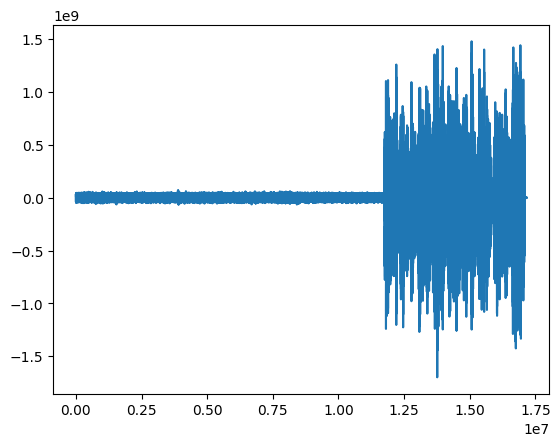

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

unvoice = AudioSegment.from_file("318622__matucha__roomtone_aircon_01.wav")
voice = AudioSegment.from_file(
    "519189__inspectorj__request-42-hmm-i-dont-know.wav")

uv_samples = np.array(unvoice.get_array_of_samples())
v_samples = np.array(voice.get_array_of_samples())

plt.plot(np.concatenate([uv_samples, v_samples]))
plt.show()

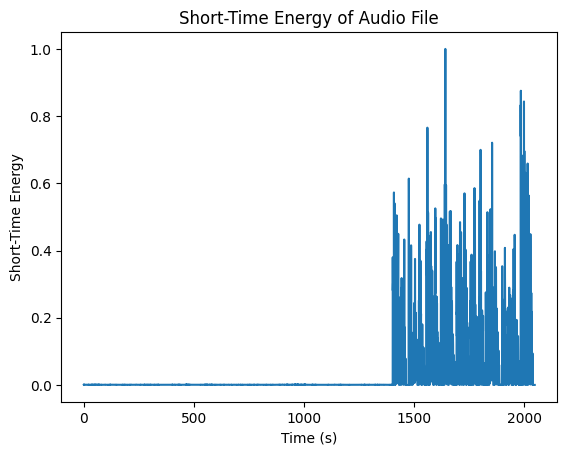

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

def STE(frame):
    return sum([x**2 for x in frame]) / len(frame)

# Load audio file
unvoice = AudioSegment.from_file("318622__matucha__roomtone_aircon_01.wav")
voice = AudioSegment.from_file(
    "519189__inspectorj__request-42-hmm-i-dont-know.wav")

# Define frame parameters
frame_size = 2048  # Replace with your desired frame size in samples
hop_size = 2048  # Replace with your desired hop size in samples

# Split audio into frames
uv_samples = np.array(unvoice.get_array_of_samples())
v_samples = np.array(voice.get_array_of_samples())
num_frames_uv = int(np.ceil(len(uv_samples) / hop_size))
num_frames_v = int(np.ceil(len(v_samples) / hop_size))
frames_uv = np.zeros((num_frames_uv, frame_size))
frames_v = np.zeros((num_frames_v, frame_size))

# Lấy từng frame của samples
for i in range(num_frames_uv):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = uv_samples[frame_start:frame_end]
    frames_uv[i, : len(frame)] = frame

for i in range(num_frames_v):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = v_samples[frame_start:frame_end]
    frames_v[i, : len(frame)] = frame
    
# Calculate STE
ste_v = np.zeros(num_frames_v)
ste_uv = np.zeros(num_frames_uv)

for i in range(num_frames_uv):
    ste_uv[i] = STE(frames_uv[i, :])
# ste_uv = ste_uv / np.max(ste_uv)


for i in range(num_frames_v):
    ste_v[i] = STE(frames_v[i, :])
# ste_v = ste_v / np.max(ste_v)

ste = np.concatenate([ste_uv, ste_v])

ste = ste / np.max(ste)

time_axis = np.arange(len(ste)) * hop_size / (num_frames_uv + num_frames_v)

plt.plot(time_axis, ste)
plt.xlabel("Time (s)")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File")

plt.show()

Optimal threshold value: 0.001001001001001001
Minimum cost: 740


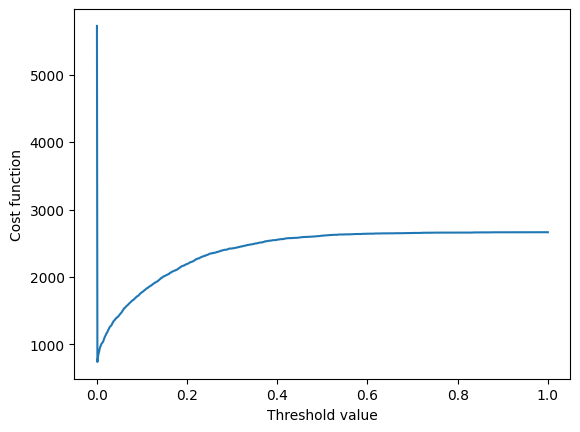

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

def STE(frame):
    return sum([x**2 for x in frame]) / len(frame)

unvoice = AudioSegment.from_file("318622__matucha__roomtone_aircon_01.wav")
voice = AudioSegment.from_file(
    "519189__inspectorj__request-42-hmm-i-dont-know.wav")

# Define frame parameters
frame_size = 2048  # Replace with your desired frame size in samples
hop_size = 2048  # Replace with your desired hop size in samples

# Split audio into frames
uv_samples = np.array(unvoice.get_array_of_samples())
v_samples = np.array(voice.get_array_of_samples())
num_frames_uv = int(np.ceil(len(uv_samples) / hop_size))
num_frames_v = int(np.ceil(len(v_samples) / hop_size))
frames_uv = np.zeros((num_frames_uv, frame_size))
frames_v = np.zeros((num_frames_v, frame_size))

# Lấy từng frame của samples
for i in range(num_frames_uv):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = uv_samples[frame_start:frame_end]
    frames_uv[i, : len(frame)] = frame

for i in range(num_frames_v):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = v_samples[frame_start:frame_end]
    frames_v[i, : len(frame)] = frame

# Calculate STE
ste_v = np.zeros(num_frames_v)
ste_uv = np.zeros(num_frames_uv)

for i in range(num_frames_uv):
    ste_uv[i] = STE(frames_uv[i, :])
# ste_uv = ste_uv / np.max(ste_uv)


for i in range(num_frames_v):
    ste_v[i] = STE(frames_v[i, :])
# ste_v = ste_v / np.max(ste_v)

ste = np.concatenate([ste_uv, ste_v])

ste = ste / np.max(ste)

# ste_v = ste_v / np.max(ste_v)

labeled_uv = np.array([0 for _ in range(num_frames_uv)])
# labeled_v = np.array([1 if ste_v[i] > 0.2 else 0 for i in range(num_frames_v)])
labeled_v = np.array([1 for _ in range(num_frames_v)])
labeled = np.concatenate([labeled_uv, labeled_v])

def cost_function(threshold):
    is_voiced = np.zeros(num_frames_uv + num_frames_v)
    for i in range(num_frames_uv + num_frames_v):
        is_voiced[i] = 1 if ste[i] > threshold else 0
    num_misclassified_frames = np.sum(labeled != is_voiced)
    return num_misclassified_frames

# Define the range of threshold values to search over
threshold_values = np.linspace(0, 1, num=1000)

# Find the threshold value that minimizes the cost function
min_threshold = np.argmin([cost_function(T) for T in threshold_values])

# Print the optimal threshold value and the corresponding cost
print("Optimal threshold value:", threshold_values[min_threshold])
print("Minimum cost:", cost_function(threshold_values[min_threshold]))

cost = []
for i in range(1000):
    cost.append(cost_function(threshold_values[i]))
    
plt.plot(threshold_values, cost)
plt.xlabel("Threshold value")
plt.ylabel("Cost function")

plt.show()

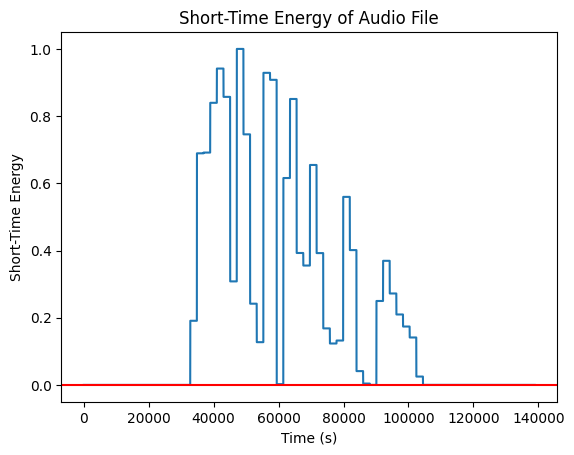

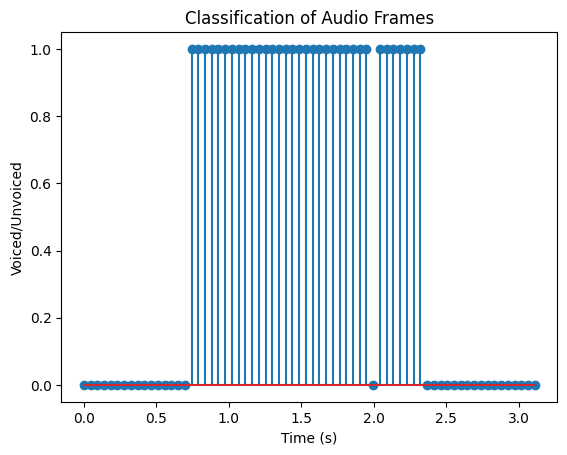

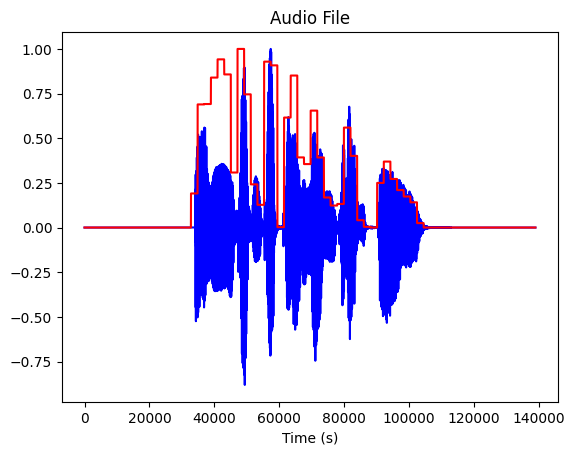

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

def STE(frame):
    return sum([x**2 for x in frame]) / len(frame)

# Define frame parameters
frame_size = 2048  # Replace with your desired frame size in samples
hop_size = 2048  # Replace with your desired hop size in samples
threshold = 0.001  # Replace with your desired threshold for STE classification

audio = AudioSegment.from_file("studio_F2.wav")

# Split audio into frames
samples = np.array(audio.get_array_of_samples())
num_frames = int(np.ceil(len(samples) / hop_size))
frames = np.zeros((num_frames, frame_size))
for i in range(num_frames):
    frame_start = i * hop_size
    frame_end = frame_start + frame_size
    frame = samples[frame_start:frame_end]
    frames[i, :len(frame)] = frame

energy = np.zeros(num_frames)
for i in range(num_frames):
    energy[i] = STE(frames[i, :])
energy = energy / np.max(energy)

is_voiced = np.zeros(num_frames)
for j in range(num_frames):
    is_voiced[j] = 1 if energy[j] > threshold else 0

sample_rate = audio.frame_rate
time_axis = np.arange(len(energy)) * hop_size / sample_rate

#plot figure

ste_samples = np.zeros(len(samples))
for i in range(num_frames):
    ste_samples[i * frame_size: i * frame_size + frame_size] = energy[i]

plt.plot(ste_samples)
plt.axhline(y = threshold, color = "red")
plt.xlabel("Time (s)")
plt.ylabel("Short-Time Energy")
plt.title("Short-Time Energy of Audio File")

plt.figure()
plt.stem(time_axis, is_voiced, use_line_collection=True)
plt.xlabel("Time (s)")
plt.ylabel("Voiced/Unvoiced")
plt.title("Classification of Audio Frames")



plt.figure()
plt.plot(samples / abs(np.max(samples)), color = "blue")
plt.plot(ste_samples, color = "red")
plt.xlabel("Time (s)")
plt.title("Audio File")

plt.show()

cost = TPerr / P + FNerr / F

file lab của thầy có sẵn đánh dấu voiced/unvoiced 